In [1]:
### classfication 

# Attribute Information:

# Input variables:
# # bank client data:
# 1 - age (numeric)
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no','yes','unknown')
# 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# # related with the last contact of the current campaign:
# 8 - contact: contact communication type (categorical: 'cellular','telephone') 
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# # other attributes:
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous: number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# # social and economic context attributes
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
# 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
# 20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
# 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os 
path = os.getcwd()
print(path)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/Jupyternotebook_source/Section_24_Machine_learning


In [4]:
banking = pd.read_csv("{0}/bank-full.csv".format(path))

In [5]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


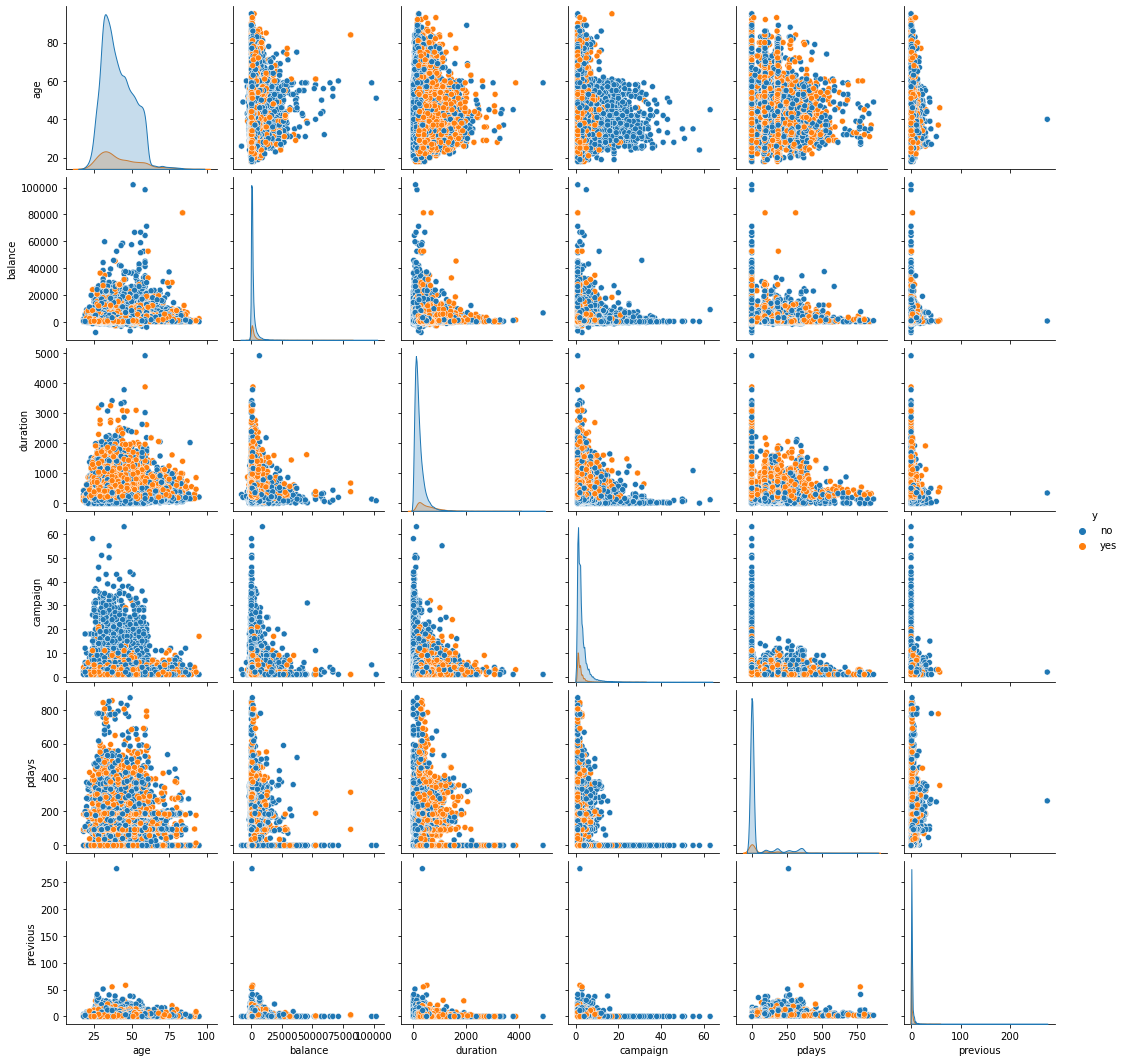

In [6]:
sns.pairplot(banking.iloc[:,[0,5,11,12,13,14,16]], hue='y')

In [8]:
banking.iloc[0,:]

age                  58
job          management
marital         married
education      tertiary
default              no
balance            2143
housing             yes
loan                 no
contact         unknown
day                   5
month               may
duration            261
campaign              1
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 0, dtype: object

In [9]:
banking.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
data = banking.iloc[:, [0,5,11,12,13,14]].corr()

<AxesSubplot:>

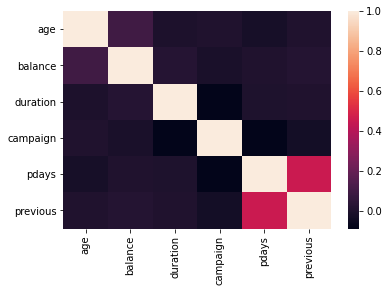

In [11]:
sns.heatmap(data)

In [12]:
### mapping

dict_target = {'yes': 1, 'no': 0}

In [13]:
banking['target'] = banking['y'].map(dict_target)
banking = banking.drop('y', axis=1)
y = banking['target'].values

In [14]:
X_ = banking.drop('target', axis=1)
X = pd.get_dummies(X_).values

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [17]:
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=12)


In [18]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [19]:
X_train

array([[ 48,   0,  18, ...,   0,   0,   1],
       [ 65, 588,  10, ...,   0,   1,   0],
       [ 56,   0,  16, ...,   0,   0,   1],
       ...,
       [ 32, 312,   7, ...,   0,   0,   1],
       [ 57, 225,  15, ...,   0,   0,   0],
       [ 55, 204,  11, ...,   0,   0,   1]])

In [20]:
y_train

array([0, 0, 1, ..., 0, 0, 1])

In [21]:
### training score
model_lr.score(X_train, y_train)

0.891672196416722

In [22]:
### téting score
model_lr.score(X_test, y_test)

0.8932876257879022

In [23]:
### Pre processing
banking.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
scaler.fit(X_train)

MinMaxScaler()

In [29]:
X_train = scaler.transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [33]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [34]:
### training score
model_lr.score(X_train, y_train)

0.9011004202610042

In [35]:
### testing score
model_lr.score(X_test, y_test)

0.9034612407386929

In [36]:
#### Grid Search CV
from sklearn.model_selection import GridSearchCV

In [37]:
Cs = np.logspace(-8,5,20)

In [38]:
grid = {'C': Cs, 'penalty': ['l1', 'l2']}

In [39]:
model_grid = LogisticRegression()

In [40]:
grid_fit = GridSearchCV(estimator=model_grid, param_grid=grid, cv=6, scoring='roc_auc')

In [41]:
grid_fit.fit(X_train,y_train)


/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfg

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-08, 4.83293024e-08, 2.33572147e-07, 1.12883789e-06,
       5.45559478e-06, 2.63665090e-05, 1.27427499e-04, 6.15848211e-04,
       2.97635144e-03, 1.43844989e-02, 6.95192796e-02, 3.35981829e-01,
       1.62377674e+00, 7.84759970e+00, 3.79269019e+01, 1.83298071e+02,
       8.85866790e+02, 4.28133240e+03, 2.06913808e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [42]:
print(grid_fit.best_params_)
print(grid_fit.best_score_)


{'C': 20691.3808111479, 'penalty': 'l2'}
0.9059879754790784


In [43]:
### Area Under the Curve

In [46]:
import scikitplot as skplt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [47]:
model = LogisticRegression(C=20691.3808111479, penalty='l2')

In [48]:
model.fit(X_train, y_train)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=20691.3808111479)

In [49]:
y_predict = model.predict(X_test)

In [50]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
print(confusion_matrix(y_test, y_predict))

[[7797  196]
 [ 670  380]]


In [54]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [55]:
### freqeuncy

In [57]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([7993, 1050]))

In [58]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

In [59]:
print((tn,fp,fn,tp))

(7797, 196, 670, 380)


In [62]:
y_predicted_probability = model.predict_proba(X_test)[:,1]

In [63]:
y_predicted_probability

array([0.01386701, 0.1417725 , 0.0930257 , ..., 0.06135901, 0.23051739,
       0.07488761])

In [64]:
roc_auc_score(y_test,y_predicted_probability)


0.909028614323247

In [65]:
y_predicted_probability_both=model.predict_proba(X_test)


In [66]:
y_predicted_probability_both

array([[0.98613299, 0.01386701],
       [0.8582275 , 0.1417725 ],
       [0.9069743 , 0.0930257 ],
       ...,
       [0.93864099, 0.06135901],
       [0.76948261, 0.23051739],
       [0.92511239, 0.07488761]])

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

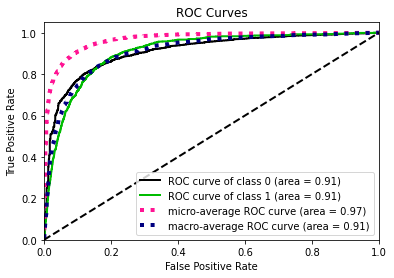

In [67]:
skplt.metrics.plot_roc_curve(y_test,y_predicted_probability_both)
